<a href="https://colab.research.google.com/github/AbhishekMangal/Ai-projects/blob/main/Flower%20Clasification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
from tensorflow import keras
from tensorflow.keras.models import Sequential
import cv2
import os
import PIL
import pathlib

In [2]:
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True) #untar for zip unzip it

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [5]:
data_dir

'./datasets/flower_photos'

In [18]:
data_dir = pathlib.Path('./datasets/flower_photos/flower_photos')
data_dir

PosixPath('datasets/flower_photos/flower_photos')

In [23]:
list(data_dir.rglob('*.jpg'))[:5]

[PosixPath('datasets/flower_photos/flower_photos/sunflowers/7820305664_82148f3bfb_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/5139971615_434ff8ed8b_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/10386702973_e74a34c806_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/3681233294_4f06cd8903.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/sunflowers/4895124535_11a2bb704c_m.jpg')]

In [25]:

image_count = len(list(data_dir.rglob('*/*.jpg')))
print(image_count)

3670


In [26]:

roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/flower_photos/roses/4735314389_94fe1b2a9f_n.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/10503217854_e66a804309.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/4979895172_ca06eba616.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/7304710956_015b41f802_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/roses/17062080069_36ac7907d2_n.jpg')]

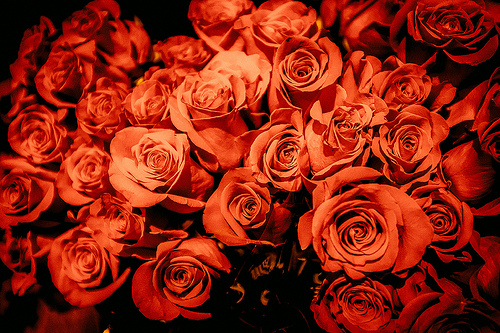

In [28]:
PIL.Image.open(str(roses[1]))

In [30]:
tulips = list(data_dir.glob('tulips/*'))
tulips[:5]

[PosixPath('datasets/flower_photos/flower_photos/tulips/16717320956_d4b00807f2.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/7064778965_ddcc6ee9f2.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/14487712670_aebe715525_m.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/8677713853_1312f65e71.jpg'),
 PosixPath('datasets/flower_photos/flower_photos/tulips/13910028149_6c9d5485ef.jpg')]

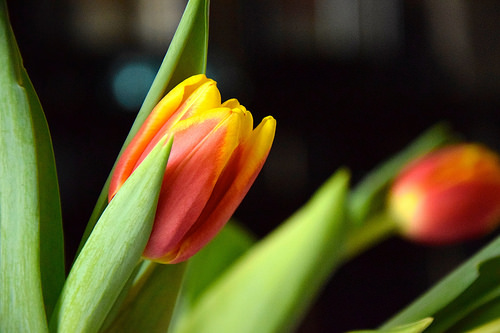

In [32]:
PIL.Image.open(str(tulips[0]))

In [33]:
flowers_images_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [34]:

flowers_labels_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4,
}

In [44]:

len(flowers_images_dict['roses'])

641

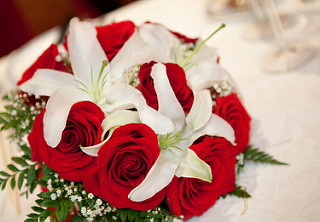

In [45]:
PIL.Image.open(str(flowers_images_dict['roses'][640]))

In [53]:
img = cv2.imread(str(flowers_images_dict['roses'][1]))
img.shape

(333, 500, 3)

In [54]:
cv2.resize(img,(180,180)).shape

(180, 180, 3)

In [61]:
X, y = [], []
for flower_name, images in flowers_images_dict.items():
    for image in images:
        img = cv2.imread(str(image))
        resized_img = cv2.resize(img,(180,180))
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])


In [62]:
y[:5]

[0, 0, 0, 0, 0]

In [63]:
X = np.array(X)
y = np.array(y)

In [64]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [65]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [68]:
model = Sequential([
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),

    layers.Flatten(),
    layers.Dense(256, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.3222 - loss: 1.7651
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.5857 - loss: 1.0911
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.6888 - loss: 0.8320
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 22ms/step - accuracy: 0.7729 - loss: 0.6564
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.8639 - loss: 0.4219
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9300 - loss: 0.2388
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 23ms/step - accuracy: 0.9623 - loss: 0.1298
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 22ms/step - accuracy: 0.9704 - loss: 0.1091
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9845 - loss: 0.0550
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.9915 - loss: 0.0487
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9865 - loss: 0.0418
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy:

In [69]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.6428 - loss: 3.0541


[2.9795403480529785, 0.6394335627555847]

In [70]:
y_pred = model.predict(X_test_scaled)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step


In [75]:
y_pred =  [np.argmax(ele) for ele in y_pred]

In [74]:
y_test[0:5]

array([1, 0, 2, 4, 2])

In [78]:
y_pred = np.array(y_pred)
y_pred[0:5]

array([1, 0, 2, 0, 2])

As We See acccuracy  on train set is high but low on test data ---> overFitting case

In [118]:
data_augmentation = keras.Sequential([
    layers.RandomZoom(0.5),
    layers.RandomRotation(0.2),
    layers.RandomContrast(0.2),
])

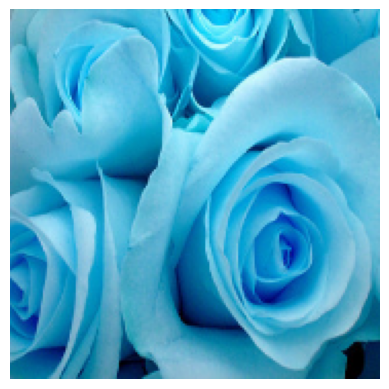

In [100]:
plt.axis("off")
plt.imshow(X[0])

(np.float64(-0.5), np.float64(179.5), np.float64(179.5), np.float64(-0.5))

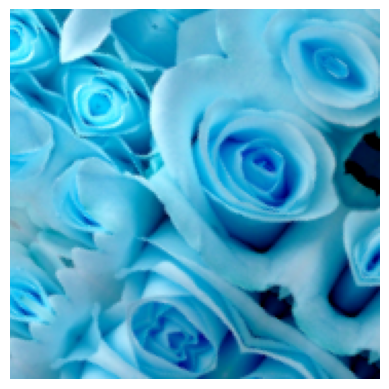

In [101]:
plt.imshow((data_augmentation(X[0]).numpy().astype("uint8")))
plt.axis("off")

In [124]:
model = Sequential([
    data_augmentation,
    layers.Conv2D(16, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(32, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, 3, padding='same', activation='relu'),
    layers.MaxPooling2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation='sigmoid'),
    layers.Dense(5, activation='softmax')
])

model.compile(optimizer='adam',
              loss= tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.3265 - loss: 1.5654
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5368 - loss: 1.1021
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5883 - loss: 0.9925
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6241 - loss: 0.9518
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6493 - loss: 0.9084
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6645 - loss: 0.8827
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6613 - loss: 0.8461
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6940 - loss: 0.7852
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.6976 - loss: 0.7758
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.7079 - loss: 0.7640
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.7216 - loss: 0.7516
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy:

In [125]:
model.evaluate(X_test_scaled,y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.7444 - loss: 0.6382


[0.6399344205856323, 0.7538126111030579]

<Sequential name=sequential_6, built=True>